# Criando os nomes

In [ ]:
import pandas as pd


In [ ]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=F')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=M')

#Estamos uitlizando uma api do IBGE que está na internet para podermos colecar os nomes
#Como qtd = 20, estamos selecionando vinte pessoas, com o sexo=f, estamos escolhendo o sexo feminino
#o & tem o mesmo significado de oprador lógico E/AND
#Estamos retirando um arquivo da internet, que é do tipo JSON

In [ ]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [ ]:
print('A quantidadade de nome é: '+ str(len(nomes_f)+len(nomes_m)))
#Para utilizarmos o + como concatenador temos que transformado o inteiro em string
print('A quantidade nome é: ', (len(nomes_f)+len(nomes_m)))
print('A quantidade de nomes é: ', (nomes_f.shape[0] + nomes_m.shape[0]))

A quantidadade de nome é: 400
A quantidade nome é:  400
A quantidade de nomes é:  400


In [ ]:
frame = [nomes_f, nomes_m]

In [ ]:
frame

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [ ]:
pd.concat(frame)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [ ]:
#nomes = pd.concat(frame)['nome']
#type(nomes)

In [ ]:
nomes = pd.concat(frame)['nome'].to_frame()
#Ao invés de ser uma series é um dataframe
type(nomes)

pandas.core.frame.DataFrame

In [ ]:
nomes.sample(5)
#Pega valores aleatórios do dataframe

,nome
137,AUGUSTO
85,HELENA
18,RAIMUNDO
12,RAFAEL
92,DIOGO


In [ ]:
#Precisamos de mais informação para essa escola


# Incluindo ID dos alunos

In [ ]:
import numpy as np

In [ ]:
np.random.seed(123)
#Vai gerar um número aleatório, mas depois todos os consequentes ficarão marcado por uma sequencia
#Só o primeiro é aleatório

In [ ]:
total_alunos = len(nomes)
total_alunos

400

In [ ]:
nomes['ID aluno'] = np.random.permutation(total_alunos) + 1
#Vai gerar 400 números aleatórios de 1 a 400, de maneira aleatoria
#Gera varios numeros aleatorios



In [ ]:
nomes.head(10)

,nome,ID aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
5,JULIANA,310
6,MARCIA,55
7,FERNANDA,288
8,PATRICIA,379
9,ALINE,92


In [ ]:
dominio = ['@gmail.com', '@yahoo.com', '@hotmail.com']
nomes['dominio'] = np.random.choice(dominio, total_alunos)
nomes['email'] = nomes.nome + nomes.dominio
nomes.head(10)

,nome,ID aluno,dominio,email
0,MARIA,235,@hotmail.com,MARIA@hotmail.com
1,ANA,43,@yahoo.com,ANA@yahoo.com
2,FRANCISCA,304,@yahoo.com,FRANCISCA@yahoo.com
3,ANTONIA,156,@yahoo.com,ANTONIA@yahoo.com
4,ADRIANA,343,@gmail.com,ADRIANA@gmail.com
5,JULIANA,310,@gmail.com,JULIANA@gmail.com
6,MARCIA,55,@hotmail.com,MARCIA@hotmail.com
7,FERNANDA,288,@hotmail.com,FERNANDA@hotmail.com
8,PATRICIA,379,@yahoo.com,PATRICIA@yahoo.com
9,ALINE,92,@hotmail.com,ALINE@hotmail.com


In [ ]:
#Outra forma
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()


# Criando a tabela cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [ ]:
cursos = pd.read_html(url)

In [ ]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

# Alterando rótulos

In [ ]:
cursos.rename(columns={'Nome do curso' : 'Nome_do_curso'})

,Nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [ ]:
cursos['id'] = cursos.index + 1

In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos.head()

,Nome do curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando alunos nos cursos

In [ ]:
# Agora que temos os cursos e temos os alunos vamos matricular todos os alunos em pelo 1 curso
# Mas tbm podem-se matricular em mais, porém quando mais cursos, menos gente fazendo
import pandas as pd
cursos

,Nome do curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [ ]:
nomes

,nome,ID aluno,dominio,email
0,MARIA,235,@hotmail.com,maria@hotmail.com
1,ANA,43,@yahoo.com,ana@yahoo.com
2,FRANCISCA,304,@yahoo.com,francisca@yahoo.com
3,ANTONIA,156,@yahoo.com,antonia@yahoo.com
4,ADRIANA,343,@gmail.com,adriana@gmail.com
...,...,...,...,...
195,WALTER,231,@yahoo.com,walter@yahoo.com
196,ARLINDO,99,@hotmail.com,arlindo@hotmail.com
197,MICHAEL,323,@gmail.com,michael@gmail.com
198,ALVARO,383,@hotmail.com,alvaro@hotmail.com


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)

In [ ]:
nomes.matriculas.describe()

count    400.000000
mean       2.100000
std        1.516823
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


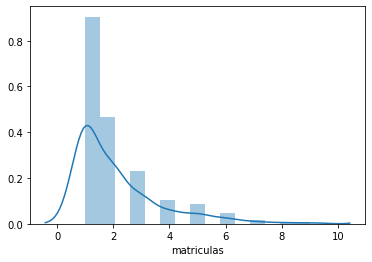

In [ ]:
import seaborn as sns
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()
#Distribuição de frequencia


1    193
2    100
3     49
4     22
5     18
6     10
7      4
9      2
8      2
Name: matriculas, dtype: int64

#Selecionando cursos

In [ ]:
#Definir de forma aleatória os cursos com que cada um dos alunos vai ficar
#Definir os cursos pelo id do curso junto com o id do aluno e o numero de matricula
todas_matriculas =[]
#Serve para armazenar o número de matriculas do aluno
x = np.random.rand(20)
#Serve para selecionar aleatoriamente os cursos
prob = x/ sum(x)
#Define qual a probabilidade de pegar cada elementoççl

In [ ]:
for index, row in nomes.iterrows():
  #Está iterando linha a linha, está fazendo com o que for pegue a linha do dataframe, linha a linha
  id = row['ID aluno']
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
matricula = pd.DataFrame(todas_matriculas, columns = ["id_aluno", 'id_curso'])

In [ ]:
matricula

,id_aluno,id_curso
0,235,8
1,235,1
2,235,7
3,43,3
4,43,11
...,...,...
835,323,20
836,323,8
837,383,12
838,366,20


In [ ]:
matricula.groupby('id_curso')
#Quebra matricula em vários dataframes menores pelos id dos cursos
#Cada dataframe novo, tem apenas um id do curso, aquele que é selecionado

In [ ]:
matricula.groupby('id_curso').count()
#Conta quantas linhas tem em cada dataframe novo
#Quantos elementos tem em cada dataframe
#Numero de dados

,id_aluno
id_curso,
1,30
2,50
3,101
4,34
5,58
6,2
7,29
8,60
9,23


In [ ]:
matricula.groupby('id_curso').count().join(cursos['Nome do curso']).rename(columns={'id_aluno' : 'Quantidade_Alunos'})
#Como Funciona o join?
#Join vai trazer dados de outro dataframe pelas colunas, nesse caso ele irá trazer os 'Nome do Curso', e ele irá identificar onde colocar o Nome do curso
#De mandeira correta pois, precisamos que o primeiro dataframe tenha um dado que se relacione com o segundo do join
#No caso é o id_curso e o id_curso irá selecionar corretamente o nome do curso associado ao seu id

,Quantidade_Alunos,Nome do curso
id_curso,,
1,30,Lógica de programação
2,50,Java para Web
3,101,C# para Web
4,34,Ruby on Rails
5,58,Cursos de Python
6,2,PHP com MySql
7,29,.NET para web
8,60,Novas integrações com Java
9,23,TDD com Java


In [ ]:
matriculas_por_curso = matricula.groupby('id_curso').count().join(cursos['Nome do curso']).rename(columns={'id_aluno' : 'Quantidade_Alunos'})

In [ ]:
matriculas_por_curso

,Quantidade_Alunos,Nome do curso
id_curso,,
1,30,Lógica de programação
2,50,Java para Web
3,101,C# para Web
4,34,Ruby on Rails
5,58,Cursos de Python
6,2,PHP com MySql
7,29,.NET para web
8,60,Novas integrações com Java
9,23,TDD com Java


In [ ]:
nomes

,nome,ID aluno,dominio,email,matriculas
0,MARIA,235,@hotmail.com,maria@hotmail.com,3
1,ANA,43,@yahoo.com,ana@yahoo.com,3
2,FRANCISCA,304,@yahoo.com,francisca@yahoo.com,5
3,ANTONIA,156,@yahoo.com,antonia@yahoo.com,2
4,ADRIANA,343,@gmail.com,adriana@gmail.com,3
...,...,...,...,...,...
195,WALTER,231,@yahoo.com,walter@yahoo.com,1
196,ARLINDO,99,@hotmail.com,arlindo@hotmail.com,2
197,MICHAEL,323,@gmail.com,michael@gmail.com,2
198,ALVARO,383,@hotmail.com,alvaro@hotmail.com,1


In [ ]:
cursos

,Nome do curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [ ]:
matricula

,id_aluno,id_curso
0,235,8
1,235,1
2,235,7
3,43,3
4,43,11
...,...,...
835,323,20
836,323,8
837,383,12
838,366,20


#Saídas em diferentes formados

In [ ]:
# CSV
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [ ]:
# JSOn
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
matriculas_json

'{"Quantidade_Alunos":{"1":30,"2":50,"3":101,"4":34,"5":58,"6":2,"7":29,"8":60,"9":23,"10":19,"11":23,"12":88,"13":8,"14":43,"15":10,"16":63,"17":10,"18":80,"19":25,"20":84},"Nome do curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
# HTML
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Quantidade_Alunos</th>\n      <th>Nome do curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>30</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>50</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>101</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>34</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>58</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>2</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>29</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>60</td>\n      <td>Novas integrações com Java</td>\n   

# Criando o banco SQL

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
engine

In [ ]:
type(engine)

In [ ]:
matriculas_por_curso.to_sql('matricula', engine)
#Tornando o dataframe matricular_por_curso em um banco sql
#'matriculas' vai ser o nome dessa tabela no banco sql
#Engine é local criado para armazer esse banco

In [ ]:
print(engine.table_names())

# Buscando do banco SQL

In [ ]:
query = 'select * from matricula where Quantidade_Alunos < 20'

In [ ]:
pd.read_sql(query, engine)

In [ ]:
pd.read_sql_table('matricula', engine, columns=['Nome do curso', 'Quantidade_Alunos'])

In [ ]:
muitas_matriculas = pd.read_sql_table('matricula', engine, columns=['Nome do curso', 'Quantidade_Alunos'])

In [ ]:
muitas_matriculas

In [ ]:
type(muitas_matriculas)

In [ ]:
#muitas_matriculas virou um dataframe e agora iremos fazer queries com isso
matriculasmais70 = muitas_matriculas.query('Quantidade_Alunos > 70')

In [ ]:
matriculasmais70

#Exportando para um SQL

In [ ]:
matriculasmais70.to_sql('matriculas70mais', engine)

In [ ]:
print(engine.table_names())

# Nomes do alunos e alunas da próxima turma

In [ ]:
#Iremos descobrir quais alunos estão em um curso
matriculas_por_curso

,Quantidade_Alunos,Nome do curso
id_curso,,
1,30,Lógica de programação
2,50,Java para Web
3,101,C# para Web
4,34,Ruby on Rails
5,58,Cursos de Python
6,2,PHP com MySql
7,29,.NET para web
8,60,Novas integrações com Java
9,23,TDD com Java


In [ ]:
id_curso_select = 16
proxima_turma = matricula.query('id_curso == {}'. format(id_curso_select))
proxima_turma

,id_aluno,id_curso
57,240,16
79,238,16
112,102,16
119,14,16
123,193,16
...,...,...
801,254,16
806,254,16
809,335,16
810,340,16


In [ ]:
matricula.head()

,id_aluno,id_curso
0,235,8
1,235,1
2,235,7
3,43,3
4,43,11


In [ ]:
nomes.rename(columns={'ID aluno' : 'id_aluno'}, inplace = True)

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
6,16,CINTIA,@hotmail.com,cintia@hotmail.com,3
13,16,EVA,@gmail.com,eva@gmail.com,1
14,16,SUELI,@hotmail.com,sueli@hotmail.com,5
17,16,WILLIAN,@yahoo.com,willian@yahoo.com,2
18,16,ODAIR,@gmail.com,odair@gmail.com,2
...,...,...,...,...,...
377,16,VALERIA,@yahoo.com,valeria@yahoo.com,3
378,16,HUGO,@yahoo.com,hugo@yahoo.com,2
382,16,FRANCISCO,@yahoo.com,francisco@yahoo.com,4


In [ ]:
#Especificando quais as colunas necessárias
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
nome_curso = cursos.loc[id_curso_select]

In [ ]:
nome_curso

Nome do curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso['Nome do curso']
nome_curso

'Estatística básica'

In [ ]:
proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)}, inplace = True)

In [ ]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
6,CINTIA
13,EVA
14,SUELI
17,WILLIAN
18,ODAIR
...,...
377,VALERIA
378,HUGO
382,FRANCISCO


# Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)